In [193]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join("..", "build")))

In [194]:
from cipells.experiments.continuous1d import *

In [195]:
import numpy as np
from matplotlib import pyplot, colors
%matplotlib notebook

In [273]:
n1 = 200
x1 = np.arange(n1, dtype=float)
dx1 = x1.copy(); dx1[n1//2 + 1:] -= n1

In [274]:
n2 = 240
x2 = np.arange(n2, dtype=float)
dx2 = x2.copy(); dx2[n2//2 + 1:] -= n2

In [275]:
t12 = AffineTransform(scaling=1.2)
t21 = t12.inverse

In [276]:
psf1 = Gaussian(6.1)
psf2 = Gaussian(6)
k2 = psf2(dx2)

In [277]:
func1 = Gaussian(scaling=8, offset=45, flux=50)
func2 = func1.transformedBy(t12)

In [278]:
noise1 = np.random.randn(n1)
noise2 = np.random.randn(n2)
signal1 = func1(x1)
signal2 = func2(x2)
noise1_ft = np.fft.rfft(noise1)
noise2_ft = np.fft.rfft(noise2)
noise1_ift2 = np.fft.irfft(noise1_ft, n2)
signal1_ft = np.fft.rfft(signal1)
signal1_ift2 = np.fft.irfft(signal1_ft, n2)

In [284]:
k2_ft = np.fft.rfft(k2)
diff = np.subtract.outer(x2, t12(x1))
s = psf1(diff)
signal_phi = np.dot(s, signal1)
noise_phi = np.dot(s, noise1)
signal_phi_ft = np.fft.rfft(signal_phi)
noise_phi_ft = np.fft.rfft(noise_phi)
signal_z_ft = signal_phi_ft/k2_ft
noise_z_ft = noise_phi_ft/k2_ft
#signal_z = np.fft.irfft(signal_z_ft, n2)
#noise_z = np.fft.irfft(noise_z_ft, n2)

/home/jbosch/LSST/conda3/python/miniconda3-4.3.21/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/home/jbosch/LSST/conda3/python/miniconda3-4.3.21/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


In [281]:
def plot(**kwds):
    pyplot.figure(figsize=(9.6, 4.8))
    for k, v in kwds.items():
        line = pyplot.plot(v.real, alpha=0.5, label=k)
        if np.iscomplex(v).any():
            pyplot.plot(v.imag, ":", alpha=0.5, color=line[0].get_color())
    pyplot.legend()

<IPython.core.display.Javascript object>


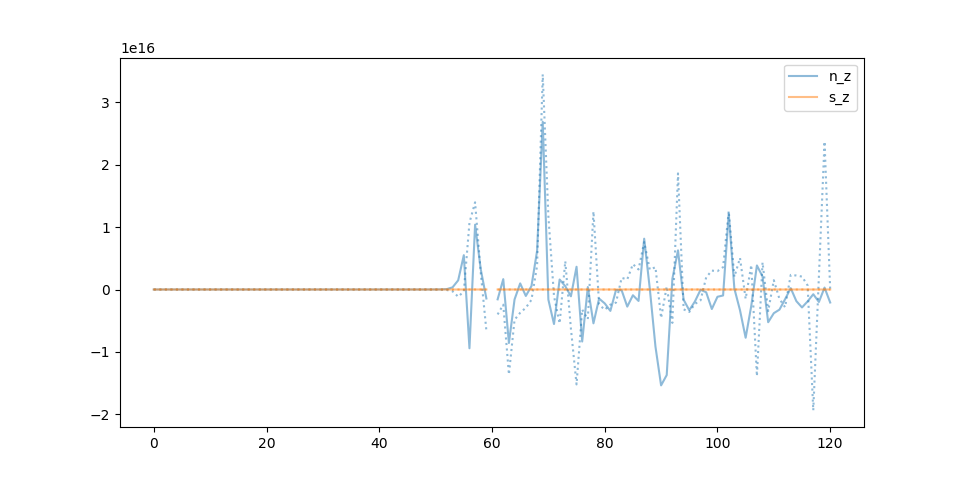

In [283]:
plot(n_z=noise_z_ft, s_z=signal_z_ft)

<IPython.core.display.Javascript object>


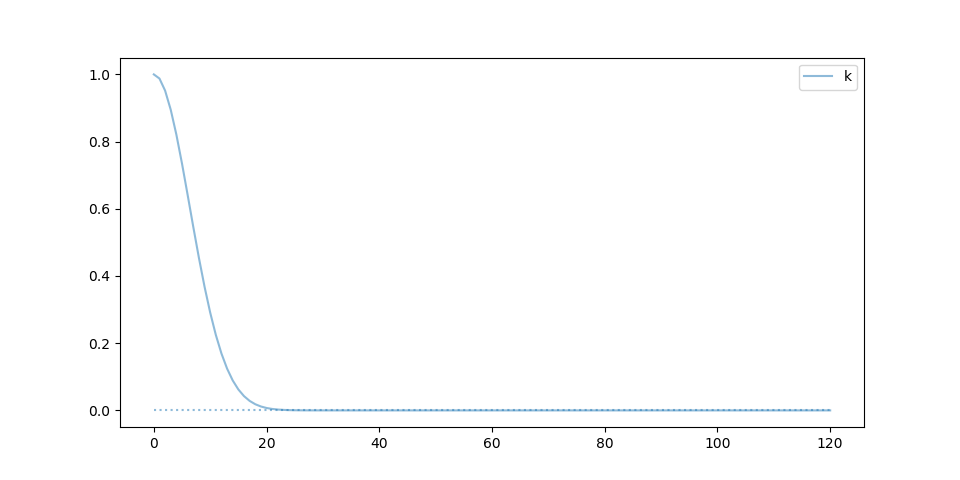

In [272]:
plot(k=k2_ft)